In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline 

In [26]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?

# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. Различается ли средний и медианный CTR объявлений в наших данных?

# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

# Для финансового отчета нужно рассчитать наш заработок по дням. В какой день мы заработали больше всего? В какой меньше? Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, и мы списываем деньги за каждый показ CPM объявления, если у CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? Сколько процентов показов приходится на каждую из платформ (колонка platform)?

# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [27]:
zip_path = Path.cwd()
zip_path = Path(zip_path, 'lesson_5_ads_data.csv.zip')

In [28]:
ads_data = pd.read_csv(zip_path, compression='zip')

In [29]:
ads_data['full_date'] = pd.to_datetime(ads_data.time, unit='s')

In [30]:
ads_data['date'] = pd.to_datetime(ads_data.date)

In [31]:
ads_data.head()

ad_id        time event       date ad_cost_type  has_video  \
0   23456  1554076848  view 2019-04-01          CPM          0   
1  111941  1554135866  view 2019-04-01          CPM          0   
2  111941  1554135866  view 2019-04-01          CPM          0   
3   42987  1554135866  view 2019-04-01          CPM          0   
4   23456  1554135866  view 2019-04-01          CPM          0   

   client_union_id  campaign_union_id platform  ad_cost  \
0             5681              23456  android    190.0   
1           111793             111941      ios    215.2   
2           111793             111941      ios    215.2   
3            28541              42985      ios    199.1   
4             5681              23456      web    190.0   

   target_audience_count  user_id           full_date  
0                 125560      793 2019-04-01 00:00:48  
1                  32277     1041 2019-04-01 16:24:26  
2                  32277       41 2019-04-01 16:24:26  
3                  80160      898 2019-04-01 16:24:26  
4                 125560       29 2019-04-01 16:24:26

In [32]:
# Получить статистику по дням. 
# Просто посчитать число всех событий по дням, число показов, число кликов, число уникальных объявлений и уникальных кампаний.
# Разобраться, почему случился такой скачок 2019-04-05? Каких событий стало больше? У всех объявлений или только у некоторых?


<AxesSubplot:xlabel='date'>

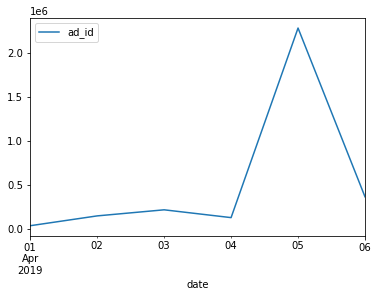

In [33]:
ads_data.groupby('date') \
    .agg({'ad_id': 'count'}).plot()

In [34]:
ads_data.groupby(['date', 'event'], as_index=False) \
    .agg({'ad_id': 'count'}) \
    .pivot(index='date', columns='event', values='ad_id').reset_index()

event       date   click     view
0     2019-04-01     735    34832
1     2019-04-02    1518   145811
2     2019-04-03    1678   214851
3     2019-04-04    1517   126182
4     2019-04-05  501595  1783288
5     2019-04-06   80420   284287

In [35]:
ads_data[ads_data.date == '2019-04-05'] \
    .groupby('ad_id') \
    .agg({'time': 'count'}) \
    .sort_values('time', ascending=False) \
    .head()

time
ad_id          
112583  2166611
29927     27186
44635      8268
46583      7327
44956      5656

In [36]:
ad_id = 112583

In [58]:
ads_data.query('ad_id == @ad_id').head(11)


ad_id        time  event       date ad_cost_type  has_video  \
527124  112583  1554480636   view 2019-04-05          CPM          0   
527125  112583  1554480636  click 2019-04-05          CPM          0   
527126  112583  1554480636   view 2019-04-05          CPM          0   
527127  112583  1554480636   view 2019-04-05          CPM          0   
527128  112583  1554480636   view 2019-04-05          CPM          0   
527129  112583  1554480636  click 2019-04-05          CPM          0   
527130  112583  1554480636   view 2019-04-05          CPM          0   
527131  112583  1554480636  click 2019-04-05          CPM          0   
527132  112583  1554480636   view 2019-04-05          CPM          0   
527133  112583  1554480636   view 2019-04-05          CPM          0   
527134  112583  1554480636   view 2019-04-05          CPM          0   

        client_union_id  campaign_union_id platform  ad_cost  \
527124           111818             112260      web    199.4   
527125           111818             112260  android    199.4   
527126           111818             112260  android    199.4   
527127           111818             112260      web    199.4   
527128           111818             112260  android    199.4   
527129           111818             112260      ios    199.4   
527130           111818             112260  android    199.4   
527131           111818             112260      ios    199.4   
527132           111818             112260      ios    199.4   
527133           111818             112260  android    199.4   
527134           111818             112260      ios    199.4   

        target_audience_count  user_id           full_date  
527124                 239408     4355 2019-04-05 16:10:36  
527125                 239408     6243 2019-04-05 16:10:36  
527126                 239408     2470 2019-04-05 16:10:36  
527127                 239408     5435 2019-04-05 16:10:36  
527128                 239408     6092 2019-04-05 16:10:36  
527129                 239408     6640 2019-04-05 16:10:36  
527130                 239408     4266 2019-04-05 16:10:36  
527131                 239408     3355 2019-04-05 16:10:36  
527132                 239408     5290 2019-04-05 16:10:36  
527133                 239408     3742 2019-04-05 16:10:36  
527134                 239408     2656 2019-04-05 16:10:36

In [38]:
# Найти топ 10 объявлений по CTR за все время. CTR — это отношение всех просмотров объявления к кликам. 
# Например, если у объявления было 100 показов и 2 клика, CTR = 0.02. 
# Различается ли средний и медианный CTR объявлений в наших данных?

In [39]:
ads_data_by_ad = ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index()

In [40]:
ads_data_by_ad

event   ad_id  click    view
0           3    9.0   490.0
1        2132    1.0    95.0
2        2276    2.0  1454.0
3        2475    NaN   132.0
4        2643    3.0   286.0
..        ...    ...     ...
350    121941    1.0   640.0
351    121943   15.0  1722.0
352    122042    1.0   155.0
353    122063    1.0   260.0
354    122086   50.0  1999.0

[355 rows x 3 columns]

In [44]:
ads_data_by_ad2 = ads_data_by_ad
ads_data_by_ad2['ctr'] = ads_data_by_ad2['click']/ads_data_by_ad2['view']
ads_data_by_ad2.sort_values('ctr', ascending=False).head(10)

event   ad_id     click       view       ctr
289    112583  580436.0  1934788.0  0.300000
324    119450     258.0     1254.0  0.205742
125     38575      43.0      257.0  0.167315
144     40968      29.0      217.0  0.133641
207     45642      42.0      344.0  0.122093
283    110924      11.0       95.0  0.115789
194     45043      28.0      245.0  0.114286
96      35034     112.0      997.0  0.112337
5        4585      53.0      476.0  0.111345
328    120347     236.0     2168.0  0.108856

In [22]:
ads_data_by_ad = ads_data_by_ad.assign(ctr = ads_data_by_ad.click / ads_data_by_ad.view, 
                           ctr_per = 100 * ads_data_by_ad.click / ads_data_by_ad.view)

In [45]:
ads_data_by_ad.sort_values('ctr', ascending=False).head(10)

event   ad_id     click       view       ctr
289    112583  580436.0  1934788.0  0.300000
324    119450     258.0     1254.0  0.205742
125     38575      43.0      257.0  0.167315
144     40968      29.0      217.0  0.133641
207     45642      42.0      344.0  0.122093
283    110924      11.0       95.0  0.115789
194     45043      28.0      245.0  0.114286
96      35034     112.0      997.0  0.112337
5        4585      53.0      476.0  0.111345
328    120347     236.0     2168.0  0.108856

In [46]:
ads_data_by_ad.ctr.mean()

0.020628096080757965

In [47]:
ads_data_by_ad.ctr.median()

0.010753240746688594

E:\ProgramFiles\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ctr'>

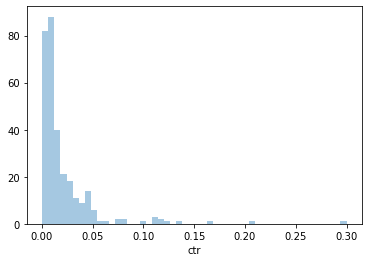

In [48]:
sns.distplot(ads_data_by_ad.ctr, kde=False)

In [49]:
# Похоже, в наших логах есть баг, объявления приходят с кликами, но без показов! 
# Сколько таких объявлений, есть ли какие-то закономерности? Эта проблема наблюдается на всех платформах?

In [50]:
ads_data_by_ad = ads_data_by_ad.fillna(0)

In [52]:
ads_data_by_ad.query('view == 0')

event   ad_id  click  view  ctr
50      25665   14.0   0.0  0.0
77      30381   77.0   0.0  0.0
150     41424    2.0   0.0  0.0
161     42241  126.0   0.0  0.0
213     45866   21.0   0.0  0.0
219     46363    7.0   0.0  0.0
224     46544   14.0   0.0  0.0
294    113348   16.0   0.0  0.0
331    120444    9.0   0.0  0.0

In [53]:
ads_ids_bug = ads_data_by_ad.query('view == 0').ad_id

In [59]:
ads_data[ads_data.ad_id.isin(ads_ids_bug)] \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

platform  ad_id
2      web     53
1      ios     92
0  android    141

In [60]:
ads_data \
    .groupby('platform', as_index=False) \
    .agg({'ad_id': 'count'}) \
    .sort_values('ad_id')

platform    ad_id
2      web   635425
1      ios   953078
0  android  1588211

In [61]:
# Есть ли различия в CTR у объявлений с видео и без? А чему равняется 95 процентиль CTR по всем объявлениям за 2019-04-04?

In [62]:
df_2019_04_04 =  ads_data[ads_data.date == '2019-04-04'].groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'count'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .fillna(0)

In [63]:
df_2019_04_04['ctr'] = df_2019_04_04.click / df_2019_04_04.view

In [64]:
df_2019_04_04[df_2019_04_04.click > 0].ctr.quantile(q=0.95)

0.10211538461538454

In [65]:
# Для финансового отчета нужно рассчитать наш заработок по дням. 
# В какой день мы заработали больше всего? В какой меньше? 
# Мы списываем с клиентов деньги, если произошел клик по CPC объявлению, 
# и мы списываем деньги за каждый показ CPM объявления, если у 
# CPM объявления цена - 200 рублей, то за один показ мы зарабатываем 200 / 1000.
# Какая платформа самая популярная для размещения рекламных объявлений? 
# Сколько процентов показов приходится на каждую из платформ (колонка platform)?


In [66]:
x = pd.Series([1, 2, 3])

In [67]:
import numpy as np

In [70]:
ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')]

ad_id        time  event       date ad_cost_type  has_video  \
248        4585  1554135960  click 2019-04-01          CPC          0   
880      120444  1554136218  click 2019-04-01          CPC          0   
1011      38110  1554136457  click 2019-04-01          CPC          0   
1569      38575  1554133580  click 2019-04-01          CPC          0   
1950      38575  1554134271  click 2019-04-01          CPC          0   
...         ...         ...    ...        ...          ...        ...   
2919449   19940  1554507113  click 2019-04-06          CPC          0   
2951415  113878  1554506129  click 2019-04-06          CPC          0   
2968612   26263  1554505928  click 2019-04-06          CPC          0   
2991470       3  1554506714  click 2019-04-06          CPC          0   
3086845       3  1554501929  click 2019-04-06          CPC          0   

         client_union_id  campaign_union_id platform  ad_cost  \
248                   37               4382  android     53.5   
880               120413             120440  android     52.0   
1011               23359              38110  android     54.1   
1569               23533              38575  android     44.8   
1950               23533              38575      ios     44.8   
...                  ...                ...      ...      ...   
2919449             2016              19939  android     54.9   
2951415           113785             113878      ios     46.3   
2968612            14710              26263      ios     47.0   
2991470                1                  1      ios     52.4   
3086845                1                  1  android     52.4   

         target_audience_count  user_id           full_date  
248                     327648      538 2019-04-01 16:26:00  
880                       4667      874 2019-04-01 16:30:18  
1011                      4181      239 2019-04-01 16:34:17  
1569                     21831     1016 2019-04-01 15:46:20  
1950                     21831      980 2019-04-01 15:57:51  
...                        ...      ...                 ...  
2919449                  24781     6614 2019-04-05 23:31:53  
2951415                   5473     8335 2019-04-05 23:15:29  
2968612                  10912     2382 2019-04-05 23:12:08  
2991470                  52875      413 2019-04-05 23:25:14  
3086845                  52875     7104 2019-04-05 22:05:29  

[1674 rows x 13 columns]

In [68]:
ads_data[(ads_data.ad_cost_type == 'CPC') &  (ads_data.event == 'click')].ad_cost.sum()

84810.0

In [69]:
ads_data[(ads_data.ad_cost_type == 'CPM') &  (ads_data.event == 'view')].ad_cost.sum() / 1000

497090.6778000003

In [155]:
# А есть ли такие объявления, по которым сначала произошел клик, а только потом показ?

In [159]:
ads_data.groupby(['ad_id', 'event'], as_index=False) \
    .agg({'time': 'min'}) \
    .pivot(index='ad_id', columns='event', values='time').reset_index() \
    .query('click < view')

event   ad_id         click          view
27      16548  1.554336e+09  1.554336e+09
81      30939  1.554165e+09  1.554173e+09
138     40464  1.554164e+09  1.554164e+09
158     42007  1.554423e+09  1.554423e+09
185     44543  1.554336e+09  1.554337e+09
201     45436  1.554336e+09  1.554336e+09
324    119450  1.554336e+09  1.554336e+09

In [161]:
ads_data[ads_data.ad_id == 16548].sort_values('time')

ad_id        time  event       date ad_cost_type  has_video  \
512690   16548  1554336083  click 2019-04-04          CPM          0   
511482   16548  1554336278   view 2019-04-04          CPM          0   
511439   16548  1554336352   view 2019-04-04          CPM          0   
511438   16548  1554336352   view 2019-04-04          CPM          0   
511437   16548  1554336352   view 2019-04-04          CPM          0   
...        ...         ...    ...        ...          ...        ...   
2056433  16548  1554422265   view 2019-04-05          CPM          0   
2056432  16548  1554422265   view 2019-04-05          CPM          0   
2056461  16548  1554422308   view 2019-04-05          CPM          0   
2056652  16548  1554422338   view 2019-04-05          CPM          0   
2056681  16548  1554422371   view 2019-04-05          CPM          0   

         client_union_id  campaign_union_id platform  ad_cost  \
512690               722              16523      ios    196.6   
511482               722              16523  android    196.6   
511439               722              16523  android    196.6   
511438               722              16523      ios    196.6   
511437               722              16523      web    196.6   
...                  ...                ...      ...      ...   
2056433              722              16523  android    196.6   
2056432              722              16523  android    196.6   
2056461              722              16523      ios    196.6   
2056652              722              16523  android    196.6   
2056681              722              16523      ios    196.6   

         target_audience_count  user_id           full_date  
512690                   53199     4133 2019-04-04 00:01:23  
511482                   53199     3736 2019-04-04 00:04:38  
511439                   53199     4968 2019-04-04 00:05:52  
511438                   53199     4206 2019-04-04 00:05:52  
511437                   53199     3898 2019-04-04 00:05:52  
...                        ...      ...                 ...  
2056433                  53199     3613 2019-04-04 23:57:45  
2056432                  53199     6044 2019-04-04 23:57:45  
2056461                  53199     5831 2019-04-04 23:58:28  
2056652                  53199     2837 2019-04-04 23:58:58  
2056681                  53199     6051 2019-04-04 23:59:31  

[2235 rows x 13 columns]